Uvozimo potrebne knjižnice za manipulacijo s podatki:

In [2]:
import random
import math
import matplotlib.pylab as plt

Izbereva poljubne točke znotraj kroga s polmerom r, s središčem v točki (0,0)

In [3]:
r=1/sqrt(math.pi)
def kvadrat_tock_krog(st_tock):
    slovar_tock = {}
    for i in range(st_tock):
        alpha = 2 * math.pi * random.random()
        x = r * math.cos(alpha)
        y = r * math.sin(alpha)
        slovar_tock['tocka_' + str(i)] = (x,y)
    return slovar_tock

Razdalje med točkami izračunamo s pomočjo Pitagorovega izreka.

In [4]:
def razdalje_krog(slovar):
    slovar_razdalj = {}
    #a^2 + b^2 = c^2
    for key1 in slovar.keys():
        seznam_razdalj = []
        # for key in slovar.keys()
        for key2 in slovar.keys():
            if key1 == key2:
                continue
            delta_x = abs(slovar[key1][0] - slovar[key2][0])
            delta_y = abs(slovar[key1][1] - slovar[key2][1])
            razdalja = sqrt(delta_x^2 + delta_y^2)
            seznam_razdalj.append((key2,razdalja))
        slovar_razdalj[key1] = seznam_razdalj
    return(slovar_razdalj)

Posamezna razdalja nam predstavlja preferenco (manjša kot je razdalja, večja je preferenca). Le te uredimo po velikosti, od najmanjše do največje, za vsako točko:

In [5]:
def preference_krog(slovar_razdalj):
    for key in slovar_razdalj.keys():
        sorted_by_second = sorted(slovar_razdalj[key], key=lambda tup: tup[1])
        slovar_razdalj[key] = sorted_by_second
    return(slovar_razdalj)

Algoritem je sestavljen iz dveh funkcij:
1) funkcija "Najkrajsa"  pregleda razdalje med točkami. Ko najde najmanjšo razdaljo izmed vseh, izbere tisti dve točki, med katerima ta razdalja nastopi in ju poveže v par. Na koncu nam vrne par točk, s pripadajočo najmanjšo razdaljo.

In [6]:
def Najkrajsa_krog(slovar):
    min_razdalja = 2*r
    par = []
    for key1 in slovar.keys():
        #nastavimo min_razdaljo na najmanjso ki nastopa v slovarju
        if slovar[key1][0][1] <= min_razdalja:
            min_razdalja = slovar[key1][0][1]

    for key2 in slovar.keys():
        if slovar[key2][0][1] == min_razdalja:
            par = [slovar[key2][0][0], key2]
            break

    return(par, min_razdalja)

2) funkcija "Vsi_pari" nam omogoči, da se čez 1. funckijo zapeljemo tolikokrat kolikokrat je potrebno in povežemo vse točke v pare. Na koncu nam vrne seznam vseh parov.

In [7]:
def Vsi_pari_krog(slovar):
    pari = []
    for i in range(len(slovar)/2):
        (par, najkrajsa) = Najkrajsa_krog(slovar)
        for e in par:
            # Izbrišemo točki v paru iz slovarja
            if str(e) in slovar:
                del slovar[str(e)]
            # izbrišemo to preferenco še vsem točkam v slovarju
            for elm in slovar.keys():
                #print(elm, slovar[elm])
                for tocka in slovar[elm]:
                    if e in tocka:
                        slovar[elm].remove(tocka)

        pari.append(par)
    return(pari)

S funkcijo "vsota_razdalj" izračunamo seštevek vseh razdalj med točkami, ki so skupaj v paru:

In [8]:
def vsota_razdalj_krog(slovar, pari):
    vsota = 0
    # Pogledamo vse pare v "pari", poiščemo točko ki nastopa v slovarju in vzamemo dolžino iz njenih preferenc do točke, s katero je v paru.
    for e in pari:
        for i in range(len(slovar[e[0]])):
            if slovar[e[0]][i][0] == e[1]:
                vsota += slovar[e[0]][i][1]
    return(vsota)

Na koncu pa še s pomočjo sledeče funkcije analiziramo, kako se obnaša naša vsota razdalj, ko povečujemo število točk.

In [9]:
def kvadrat_tock(st_tock):
    slovar_tock = {}
    for i in range(st_tock):
        x = random.random()
        y = random.random()
        slovar_tock['tocka_' + str(i)] = (x,y)
    return slovar_tock

In [10]:
def razdalje(slovar):
    slovar_razdalj = {}
    #a^2 + b^2 = c^2
    for key1 in slovar.keys():
        seznam_razdalj = []
        # for key in slovar.keys()
        for key2 in slovar.keys():
            if key1 == key2:
                continue
            delta_x = slovar[key1][0] - slovar[key2][0]
            delta_y = slovar[key1][1] - slovar[key2][1]
            razdalja = sqrt(delta_x^2 + delta_y^2)
            seznam_razdalj.append((key2,razdalja))
        slovar_razdalj[key1] = seznam_razdalj
    return(slovar_razdalj)


In [11]:
def preference(slovar_razdalj):
    for key in slovar_razdalj.keys():
        sorted_by_second = sorted(slovar_razdalj[key], key=lambda tup: tup[1])
        slovar_razdalj[key] = sorted_by_second
    return(slovar_razdalj)

In [12]:
def Najkrajsa(slovar):
    min_razdalja = sqrt(2)
    par = []
    for key1 in slovar.keys():
        #nastavimo min_razdaljo na najmanjso ki nastopa v slovarju
        if slovar[key1][0][1] <= min_razdalja:
            min_razdalja = slovar[key1][0][1]

    for key2 in slovar.keys():
        if slovar[key2][0][1] == min_razdalja:
            par = [slovar[key2][0][0], key2]
            break

    return(par, min_razdalja)

In [13]:
def Vsi_pari(slovar):
    pari = []
    for i in range(len(slovar)/2):
        (par, najkrajsa) = Najkrajsa(slovar)
        for e in par:
            # Izbrišemo točki v paru iz slovarja
            if str(e) in slovar:
                del slovar[str(e)]
            # izbrišemo to preferenco še vsem točkam v slovarju
            for elm in slovar.keys():
                #print(elm, slovar[elm])
                for tocka in slovar[elm]:
                    if e in tocka:
                        slovar[elm].remove(tocka)

        pari.append(par)
    return(pari)

In [14]:
def vsota_razdalj(slovar, pari):
    vsota = 0
    # Pogledamo vse pare v "pari", poiščemo točko ki nastopa v slovarju in vzamemo dolžino iz njenih preferenc do točke, s katero je v paru.
    for e in pari:
        for i in range(len(slovar[e[0]])):
            if slovar[e[0]][i][0] == e[1]:
                vsota += slovar[e[0]][i][1]
    return(vsota)

In [15]:
def razlicne_vsote(od, do, korak):
    slovar_vsote={}
    for i in range(od, do + 1, korak):
        slovar_vsote[i]=  vsota_razdalj(preference(razdalje(kvadrat_tock(i))),Vsi_pari(preference(razdalje(kvadrat_tock(i)))))
    return(slovar_vsote)

In [16]:
def razlicne_vsote_krog(od, do, korak):
    slovar_vsote={}
    for i in range(od, do + 1, korak):
        slovar_vsote[i]=  vsota_razdalj_krog(preference_krog(razdalje_krog(kvadrat_tock_krog(i))),Vsi_pari_krog(preference_krog(razdalje_krog(kvadrat_tock_krog(i)))))
    return(slovar_vsote)

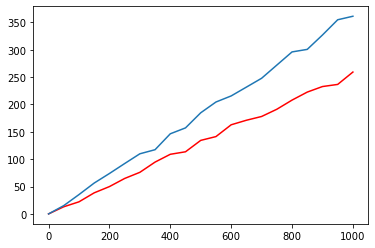

In [17]:
slovar = razlicne_vsote(0,1000,50)
plt.plot(*zip(*sorted(slovar.items())),'r')

slovar_krog = razlicne_vsote_krog(0,1000,50)
plt.plot(*zip(*sorted(slovar_krog.items())))

plt.show()

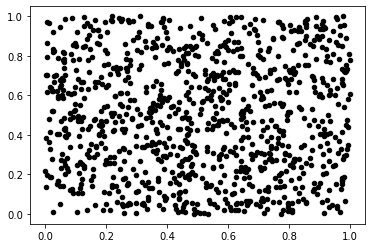

In [18]:
def tocke(st_tock):
    for i in range(st_tock):
        x = random.random()
        y = random.random()
        plt.plot(x,y,'ko',markersize=4.5)
    return(plt.show())

tocke(1000)